In [2]:

# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# 1. **Data Exploration and Preprocessing**
1.1 Load Data and Check Basic Information
Goal: Get an overview of the dataset and identify potential issues like missing values or incorrect data types.

In [4]:
# Check the shape of the dataset
print(f'Dataset Shape: {df.shape}')

# Overview of data types and missing values
df.info()

# Get summary statistics for numerical columns
df.describe()


Dataset Shape: (920, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# 1.2 **Handle Missing Data**
Goal: Check for and handle missing values appropriately, either by imputation, dropping rows, or filling with mean/median.

In [5]:
# Check for missing data
# calculate missing values
print("----------------------------------------")
print(f"Missing values in each column:\n{df.isnull().sum().sort_values(ascending=False)}")
print("----------------------------------------")
print(f"Percentage of missing values in each column:\n{round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)}")

----------------------------------------
Missing values in each column:
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
num           0
dtype: int64
----------------------------------------
Percentage of missing values in each column:
ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64


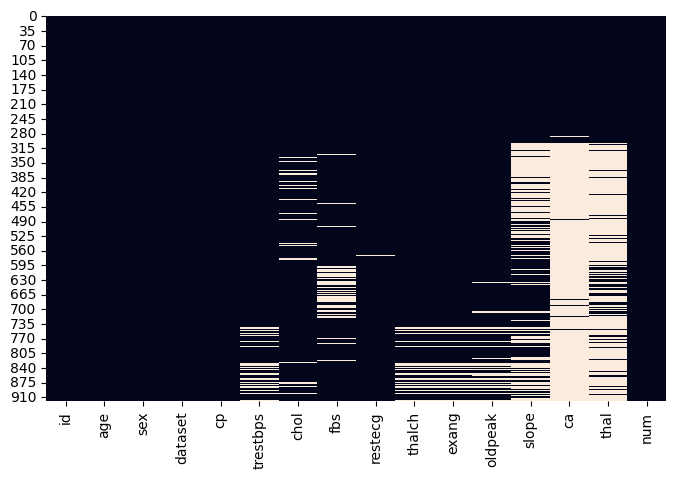

In [6]:
# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [7]:
df.drop('ca', axis=1, inplace=True)

In [8]:
# Loop to handle imputation for categorical and numerical columns separately
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column].fillna(df[column].mode()[0], inplace=True)  # Impute with mode
    else:  # Column is numerical
        df[column].fillna(df[column].median(), inplace=True)  # Impute with median

# Print the imputed DataFrame
# print(df)


In [9]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

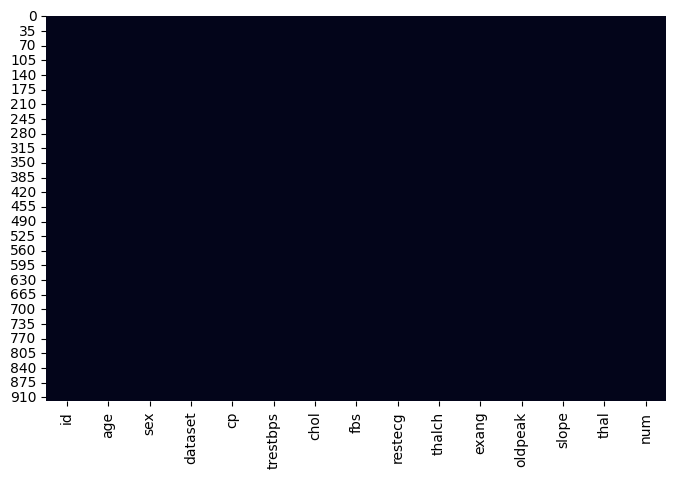

In [10]:
# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# 1.3 **Outlier Detection and Handling**
Goal: Identify and handle outliers using statistical methods like the Interquartile Range (IQR) or capping techniques.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  thal      920 non-null    object 
 14  num       920 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(6)
memory usage: 95.4+ KB


In [12]:
df['dataset'].unique

<bound method Series.unique of 0          Cleveland
1          Cleveland
2          Cleveland
3          Cleveland
4          Cleveland
           ...      
915    VA Long Beach
916    VA Long Beach
917    VA Long Beach
918    VA Long Beach
919    VA Long Beach
Name: dataset, Length: 920, dtype: object>

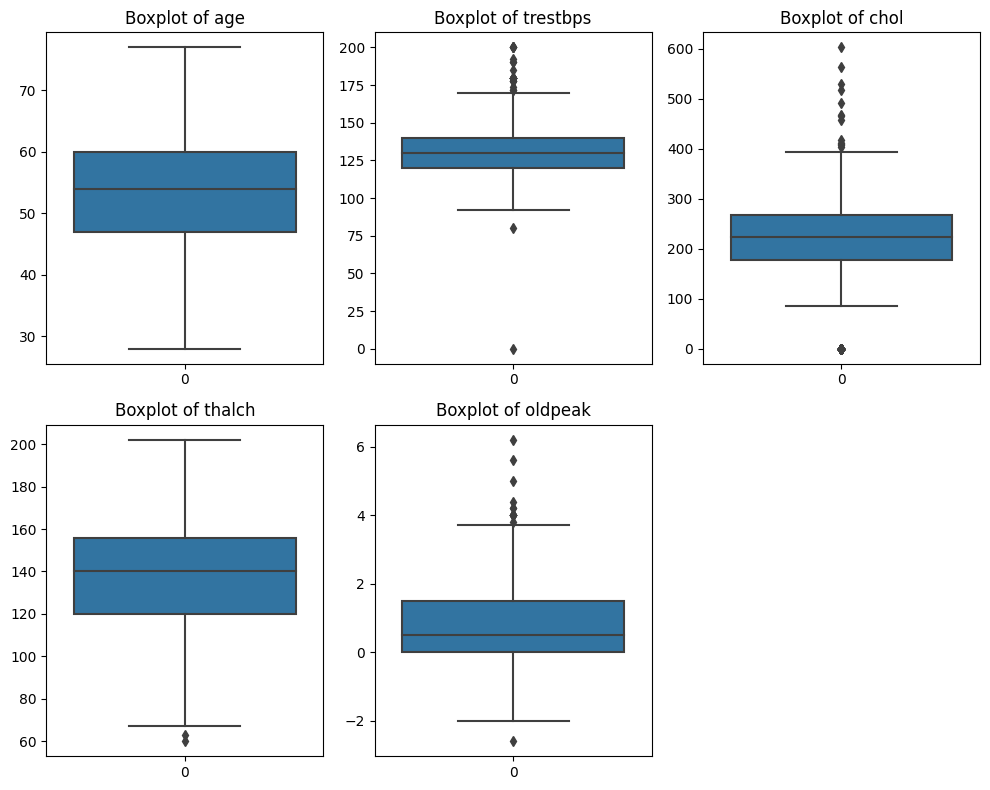

In [13]:
# Plot boxplots for numerical features
plt.figure(figsize=(10, 8))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalch', 'oldpeak']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**1.3.2 IQR for Numerical Outlier Detection**

In [14]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    if outliers.empty:
        print(f"No outliers detected in column '{column}'.")
    else:
        print(f"Outliers detected in column '{column}':\n{outliers}\nTotal outliers: {len(outliers)}")
    
    return outliers

# Example: Detecting outliers in 'chol' column
outliers_chol = detect_outliers_iqr(df, 'age')


No outliers detected in column 'age'.


In [15]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    if outliers.empty:
        print(f"No outliers detected in column '{column}'.")
    else:
        print(f"Outliers detected in column '{column}':\n{outliers}\nTotal outliers: {len(outliers)}")
    
    return outliers

# Example: Detecting outliers in 'chol' column
outliers_chol = detect_outliers_iqr(df, 'trestbps')

Outliers detected in column 'trestbps':
      id  age     sex        dataset               cp  trestbps   chol    fbs  \
14    15   52    Male      Cleveland      non-anginal     172.0  199.0   True   
83    84   68    Male      Cleveland      non-anginal     180.0  274.0   True   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
172  173   59  Female      Cleveland     asymptomatic     174.0  249.0  False   
183  184   59    Male      Cleveland   typical angina     178.0  270.0  False   
188  189   54    Male      Cleveland  atypical angina     192.0  283.0  False   
201  202   64  Female      Cleveland     asymptomatic     180.0  325.0  False   
213  214   66  Female      Cleveland     asymptomatic     178.0  228.0   True   
231  232   55  Female      Cleveland     asymptomatic     180.0  327.0  False   
338  339   39    Male        Hungary  atypical angina     190.0  241.0  False   
375  376   45  Female        Hungary  atypical angina     180.0  223.

**Z-score**

In [16]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [17]:
from scipy import stats
import numpy as np

# Calculate Z-scores for the 'chol' column
z_scores = stats.zscore(df['age'])

# Set the threshold for outliers (Z > 3 or Z < -3)
threshold = 3

# Detect outliers (Z-score greater than 3 or less than -3)
outliers_z = df[np.abs(z_scores) > threshold]

# Print the Z-scores along with the values
df['z_score'] = z_scores  # Adding Z-scores to the dataframe for better understanding

# Check if outliers exist and display the results
if outliers_z.empty:
    print(f"No outliers detected in the 'chol' column using Z-score method (threshold: {threshold}).")
else:
    print(f"Outliers detected using Z-score method (threshold: {threshold}):")
    print(outliers_z[['age','slope']])  # Display the outliers with their Z-scores


No outliers detected in the 'chol' column using Z-score method (threshold: 3).


In [18]:
from scipy import stats
import numpy as np

# Calculate Z-scores for the 'chol' column
z_scores = stats.zscore(df['chol'])

# Set the threshold for outliers (Z > 3 or Z < -3)
threshold = 3

# Detect outliers (Z-score greater than 3 or less than -3)
outliers_z = df[np.abs(z_scores) > threshold]

# Print the Z-scores along with the values
df['z_score'] = z_scores  # Adding Z-scores to the dataframe for better understanding

# Check if outliers exist and display the results
if outliers_z.empty:
    print(f"No outliers detected in the 'chol' column using Z-score method (threshold: {threshold}).")
else:
    print(f"Outliers detected using Z-score method (threshold: {threshold}):")
    print(outliers_z[['chol','age']])  # Display the outliers with their Z-scores


Outliers detected using Z-score method (threshold: 3):
      chol  age
152  564.0   67
528  529.0   32
546  603.0   54


# 3.1 **Removing Outliers:**
For some extreme outliers that could be errors or noise, we can remove them from the dataset.

In [19]:
# Remove outliers from 'chol' column based on IQR
df_no_outliers = df[(df['chol'] >= df['chol'].quantile(0.01)) & (df['chol'] <= df['chol'].quantile(0.99))]


**3.2  Capping/Flooring Outliers**

If you want to keep the outliers but reduce their impact, you can cap the extreme values at a threshold (e.g., the 1st and 99th percentiles).

In [20]:
# Cap values for 'chol' at 1st and 99th percentiles
df['chol'] = df['chol'].clip(lower=df['chol'].quantile(0.01), upper=df['chol'].quantile(0.99))


3.3 Transforming Data:
If the data has a long-tailed distribution, we can use log transformation to make the distribution more normal.

In [21]:
# Apply log transformation on skewed numerical features like 'chol' and 'trestbps'
df['chol_log'] = np.log1p(df['chol'])  # log1p to handle zeros
df['trestbps_log'] = np.log1p(df['trestbps'])


# **1.4 Normalization or Standardization**
Goal: Scale numerical features to ensure uniformity across different models.

In [22]:
df.dtypes

id                int64
age               int64
sex              object
dataset          object
cp               object
trestbps        float64
chol            float64
fbs                bool
restecg          object
thalch          float64
exang              bool
oldpeak         float64
slope            object
thal             object
num               int64
z_score         float64
chol_log        float64
trestbps_log    float64
dtype: object

In [23]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to standardize
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak','num','z_score','chol_log','trestbps_log']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


**1.4.2 Normalization (Optional, if needed)**

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max normalization (values between 0 and 1)
minmax_scaler = MinMaxScaler()
df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])


**2. Feature Engineering**
2.1 Create New Features
Goal: Add more meaningful features based on existing columns and domain knowledge.

In [25]:
# 2.1.1 Binning Age Groups

# Create age group categories
df['age_group'] = pd.cut(df['age'], bins=[0, 35, 50, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])


In [26]:
# 2.1.2 Interaction Features
# Interaction between age and cholesterol
df['age_chol_interaction'] = df['age'] * df['chol']


In [27]:
# Create a risk score feature based on medical knowledge
df['risk_score'] = df['trestbps'] * df['chol'] / df['age']


In [28]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,...,oldpeak,slope,thal,num,z_score,chol_log,trestbps_log,age_group,age_chol_interaction,risk_score
0,1,0.714286,Male,Cleveland,typical angina,0.725,0.566317,True,lv hypertrophy,0.633803,...,0.556818,downsloping,fixed defect,0.00,0.386401,0.905889,0.939717,Young,0.404512,0.574812
1,2,0.795918,Male,Cleveland,asymptomatic,0.800,0.695136,False,lv hypertrophy,0.338028,...,0.465909,flat,normal,0.50,0.474295,0.939791,0.958158,Young,0.553272,0.698701
2,3,0.795918,Male,Cleveland,asymptomatic,0.600,0.556595,False,lv hypertrophy,0.485915,...,0.590909,flat,reversable defect,0.25,0.379768,0.903025,0.904302,Young,0.443004,0.419587
3,4,0.183673,Male,Cleveland,non-anginal,0.650,0.607637,False,normal,0.894366,...,0.693182,downsloping,normal,0.00,0.414594,0.917534,0.919275,Young,0.111607,2.150359
4,5,0.265306,Female,Cleveland,atypical angina,0.650,0.495832,False,lv hypertrophy,0.788732,...,0.454545,upsloping,normal,0.00,0.338308,0.883918,0.919275,Young,0.131547,1.214787


**2.2 Handling Categorical Variables**
Goal: Convert categorical variables into numerical formats for use in machine learning models.

2.2.1 One-Hot Encoding

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    920 non-null    int64   
 1   age                   920 non-null    float64 
 2   sex                   920 non-null    object  
 3   dataset               920 non-null    object  
 4   cp                    920 non-null    object  
 5   trestbps              920 non-null    float64 
 6   chol                  920 non-null    float64 
 7   fbs                   920 non-null    bool    
 8   restecg               920 non-null    object  
 9   thalch                920 non-null    float64 
 10  exang                 920 non-null    bool    
 11  oldpeak               920 non-null    float64 
 12  slope                 920 non-null    object  
 13  thal                  920 non-null    object  
 14  num                   920 non-null    float64 
 15  z_scor

In [30]:
# One-hot encode categorical columns
# df_encoded = pd.get_dummies(df, columns=['sex','dataset', 'cp', 'thal', 'age_group','slope'])
# df_encoded

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
# Step 1: Handle missing values (fill NaNs with a placeholder or drop them)
# df['fbs'].fillna('Unknown', inplace=True)  # Fill with a placeholder
# df['restecg'].fillna('Unknown', inplace=True)  # Fill with a placeholder
# df['exang'].fillna('Unknown', inplace=True)  # Fill with a placeholder
# df['slope'].fillna('Unknown', inplace=True)  # Fill with a placeholder
# df['thal'].fillna('Unknown', inplace=True)  # Fill with a placeholder
# df['ca'].fillna(0, inplace=True)  # Assuming 0 means no major vessels

# Step 2: Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Step 3: Apply Label Encoding to categorical columns
categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Step 4: Check the new DataFrame
print(df.head())


   id       age  sex  dataset  cp  trestbps      chol  fbs  restecg    thalch  \
0   1  0.714286    1        0   3     0.725  0.566317    1        0  0.633803   
1   2  0.795918    1        0   0     0.800  0.695136    0        0  0.338028   
2   3  0.795918    1        0   0     0.600  0.556595    0        0  0.485915   
3   4  0.183673    1        0   2     0.650  0.607637    0        1  0.894366   
4   5  0.265306    0        0   1     0.650  0.495832    0        0  0.788732   

   ...   oldpeak  slope  thal   num   z_score  chol_log  trestbps_log  \
0  ...  0.556818      0     0  0.00  0.386401  0.905889      0.939717   
1  ...  0.465909      1     1  0.50  0.474295  0.939791      0.958158   
2  ...  0.590909      1     2  0.25  0.379768  0.903025      0.904302   
3  ...  0.693182      0     1  0.00  0.414594  0.917534      0.919275   
4  ...  0.454545      2     1  0.00  0.338308  0.883918      0.919275   

   age_group age_chol_interaction  risk_score  
0      Young             0

In [34]:
df.dtypes

id                         int64
age                      float64
sex                        int32
dataset                    int32
cp                         int32
trestbps                 float64
chol                     float64
fbs                        int64
restecg                    int32
thalch                   float64
exang                      int64
oldpeak                  float64
slope                      int32
thal                       int32
num                      float64
z_score                  float64
chol_log                 float64
trestbps_log             float64
age_group               category
age_chol_interaction     float64
risk_score               float64
dtype: object

**3. Model Building**
3.1 Train-Test Split
Goal: Split the dataset into training and testing sets for model validation.

In [42]:
df.dtypes

id                         int64
age                      float64
sex                        int32
dataset                    int32
cp                         int32
trestbps                 float64
chol                     float64
fbs                        int64
restecg                    int32
thalch                   float64
exang                      int64
oldpeak                  float64
slope                      int32
thal                       int32
num                      float64
z_score                  float64
chol_log                 float64
trestbps_log             float64
age_group               category
age_chol_interaction     float64
risk_score               float64
dtype: object

In [44]:
# Perform One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df, columns=['age_group'], prefix='age')

print(df_one_hot_encoded)

      id       age  sex  dataset  cp  trestbps      chol  fbs  restecg  \
0      1  0.714286    1        0   3     0.725  0.566317    1        0   
1      2  0.795918    1        0   0     0.800  0.695136    0        0   
2      3  0.795918    1        0   0     0.600  0.556595    0        0   
3      4  0.183673    1        0   2     0.650  0.607637    0        1   
4      5  0.265306    0        0   1     0.650  0.495832    0        0   
..   ...       ...  ...      ...  ..       ...       ...  ...      ...   
915  916  0.530612    0        3   0     0.635  0.809372    1        2   
916  917  0.693878    1        3   3     0.650  0.337846    0        2   
917  918  0.551020    1        3   0     0.610  0.542012    1        2   
918  919  0.612245    1        3   0     0.650  0.935761    1        0   
919  920  0.693878    1        3   1     0.600  0.617359    0        0   

       thalch  ...   num   z_score  chol_log  trestbps_log  \
0    0.633803  ...  0.00  0.386401  0.905889     

In [48]:
import pandas as pd

# Sample DataFrame with 'age_group' column
data = {
    'age_group': ['Young', 'Middle-aged', 'Elderly', 'Young', 'Elderly', 'Middle-aged', 'Young', 'Elderly', 'Middle-aged', 'Young'],
}

df = pd.DataFrame(data)

# Perform One-Hot Encoding
df = pd.get_dummies(df, columns=['age_group'], prefix='age')

print(df)


   age_Elderly  age_Middle-aged  age_Young
0            0                0          1
1            0                1          0
2            1                0          0
3            0                0          1
4            1                0          0
5            0                1          0
6            0                0          1
7            1                0          0
8            0                1          0
9            0                0          1


**3.2 Basic Models**

3.2.1 Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 4: Define features (X) and target (y)
X = df.drop(['id', 'num'], axis=1)  # Drop 'id' and 'num' (target variable) from features
y = df['num']  # Target variable

# Step 5: Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_log = log_model.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy_log}')


KeyError: "['id', 'num'] not found in axis"

**3.3 Ensemble Techniques**

3.3.1 Random Forest (Bagging)

In [41]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


ValueError: could not convert string to float: 'VA Long Beach'

**3.3.2 XGBoost (Boosting)**

In [42]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:dataset: object, restecg: object, slope: object

3.3.3 **Stacking**

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True))
]

# Stacking model with Logistic Regression as meta-learner
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_stack = stacking_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f'Stacking Model Accuracy: {accuracy_stack}')


ValueError: could not convert string to float: 'VA Long Beach'

**Voting Classifier**

In [44]:
from sklearn.ensemble import VotingClassifier

# Voting classifier
voting_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, random_state=42))
], voting='hard')  # Majority voting

voting_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred_voting = voting_model.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f'Voting Classifier Accuracy: {accuracy_voting}')


ValueError: could not convert string to float: 'VA Long Beach'

**4. Model Evaluation**
4.1 Evaluation Metrics
Goal: Use evaluation metrics like accuracy, ROC-AUC, and F1-score for model performance.

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

# Evaluate Random Forest
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Random Forest ROC-AUC: {roc_auc_rf}')
print(f'Random Forest F1-Score: {f1_rf}')


**5. Model Interpretability (Explainability)**

5.1 SHAP for Explainability
Goal: Use SHAP to interpret model predictions and understand the impact of each feature.

In [45]:
import shap

# SHAP for Random Forest
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values[1], X_test)


ModuleNotFoundError: No module named 'shap'